In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

In [3]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file(
    'flower_photos',
    origin=dataset_url,
    cache_dir='.',
    untar=True
)

228818944/228813984 [==============================] - 23s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))

In [7]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [8]:
X, y = [], []
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [9]:
X = np.array(X)
y = np.array(y)

In [10]:
X.shape, y.shape

((3670, 180, 180, 3), (3670,))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
X_train.shape

(2752, 180, 180, 3)

In [13]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [14]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(50, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(50, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(5, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=3)

2022-07-27 05:59:55.338041: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-27 05:59:55.343160: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-27 05:59:55.349724: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-07-27 05:59:56.475171: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-27 05:59:56.514033: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2893610000 Hz


Epoch 1/3
86/86 [==============================] - 130s 2s/step - loss: 2.1773 - accuracy: 0.2733
Epoch 2/3
86/86 [==============================] - 138s 2s/step - loss: 1.0477 - accuracy: 0.5579
Epoch 3/3
86/86 [==============================] - 136s 2s/step - loss: 0.8024 - accuracy: 0.6872


In [18]:
y_predicted = model.predict(X_test_scaled)
y_predicted = [np.argmax(pred) for pred in y_predicted]
y_predicted

[2,
 1,
 4,
 4,
 2,
 3,
 4,
 0,
 3,
 1,
 1,
 3,
 2,
 3,
 4,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 1,
 4,
 3,
 2,
 2,
 4,
 4,
 0,
 4,
 1,
 2,
 3,
 1,
 2,
 2,
 2,
 1,
 1,
 4,
 4,
 4,
 4,
 2,
 3,
 3,
 3,
 2,
 1,
 4,
 4,
 1,
 1,
 3,
 4,
 0,
 2,
 4,
 4,
 0,
 2,
 4,
 2,
 2,
 3,
 2,
 4,
 4,
 4,
 1,
 2,
 3,
 0,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 1,
 3,
 1,
 4,
 1,
 2,
 3,
 4,
 2,
 0,
 2,
 2,
 4,
 1,
 3,
 1,
 4,
 1,
 4,
 3,
 2,
 4,
 4,
 1,
 2,
 4,
 2,
 4,
 2,
 2,
 0,
 2,
 3,
 4,
 3,
 3,
 4,
 1,
 0,
 0,
 1,
 4,
 4,
 2,
 2,
 2,
 1,
 4,
 2,
 3,
 0,
 1,
 1,
 4,
 4,
 3,
 4,
 2,
 3,
 4,
 4,
 4,
 2,
 3,
 1,
 0,
 3,
 2,
 4,
 4,
 2,
 2,
 1,
 4,
 1,
 4,
 2,
 2,
 0,
 4,
 2,
 1,
 4,
 1,
 3,
 4,
 1,
 4,
 4,
 4,
 1,
 1,
 0,
 3,
 4,
 3,
 1,
 4,
 1,
 4,
 2,
 4,
 4,
 1,
 4,
 2,
 2,
 2,
 2,
 4,
 4,
 2,
 4,
 1,
 4,
 2,
 4,
 3,
 2,
 4,
 2,
 2,
 4,
 4,
 0,
 1,
 2,
 3,
 4,
 3,
 4,
 4,
 3,
 0,
 1,
 1,
 4,
 0,
 2,
 0,
 2,
 2,
 4,
 4,
 1,
 1,
 2,
 2,
 3,
 0,
 2,
 4,
 3,
 3,
 2,
 1,
 3,
 3,
 4,
 4,
 4,
 1,
 4,
 1,
 4,
 4,
 0,
 4,
 4,


In [40]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(180,180,3)),
    keras.layers.experimental.preprocessing.RandomZoom(0.5),
    keras.layers.experimental.preprocessing.RandomContrast(0.5),
    keras.layers.experimental.preprocessing.RandomRotation(0.5)
])

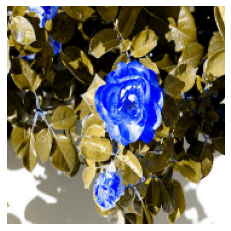

In [32]:
plt.axis('off')
plt.imshow(X[10])

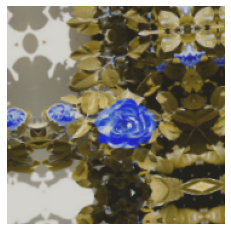

In [39]:
plt.axis('off')
plt.imshow(data_augmentation(X)[10])

In [41]:
model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(50, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(50, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(5, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=3)

Epoch 1/3
86/86 [==============================] - 141s 2s/step - loss: 1.8171 - accuracy: 0.3291
Epoch 2/3
86/86 [==============================] - 148s 2s/step - loss: 1.2635 - accuracy: 0.4711
Epoch 3/3
86/86 [==============================] - 147s 2s/step - loss: 1.1767 - accuracy: 0.5145


In [42]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 7s 230ms/step - loss: 1.0790 - accuracy: 0.5501


[1.0789636373519897, 0.5501089096069336]